# Challenge 2 - Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas and matplotlib. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
# import all the relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# import the data file liquor_store_sales.csv
alc_sales = pd.read_csv('../data/liquor_store_sales.csv')
alc_sales

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

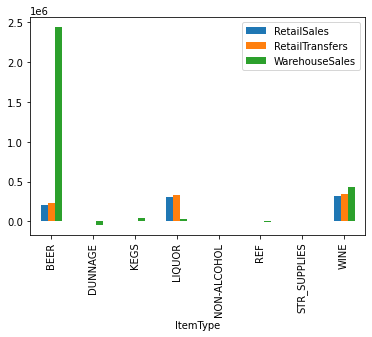

In [13]:
# groupby ItemType

# grouped_item = alc_sales[["RetailSales", "RetailTransfers", "WarehouseSales"]].groupby(["ItemType"]).sum()

grouped_item = alc_sales.groupby(['ItemType']).agg('sum')[['RetailSales', 'RetailTransfers', 'WarehouseSales']]
grouped_item.plot.bar()
plt.show()

## 2. Create a bar chart showing total Retail Sales for the top 10 suppliers with the most total sales. 

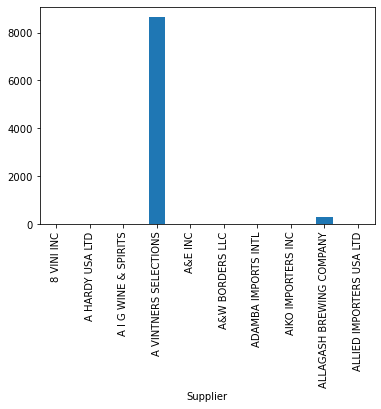

In [15]:
top_sellers = alc_sales.groupby(['Supplier']).agg('sum')['RetailSales'][0:10]
top_sellers.plot.bar()
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [26]:
set(alc_sales['Month'])

{1, 2, 4, 5, 6, 8, 9, 10, 11, 12}

In [27]:
alc_sales['Month']

# can I somehow combine months and year? groupby? 

0         4
1         4
2         4
3         4
4         4
         ..
128350    2
128351    2
128352    2
128353    2
128354    2
Name: Month, Length: 128355, dtype: int64

In [47]:
over_time = alc_sales.groupby(['Year','Month']).agg('mean')
over_time

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909
     10        6.549021         6.827827       22.289367
     11        6.765496         7.103699       23.348862
     12        9.078241         8.353759       21.169463
2018 1         5.679413         5.574833       19.072137
     2         5.939247         6.050136       20.229658

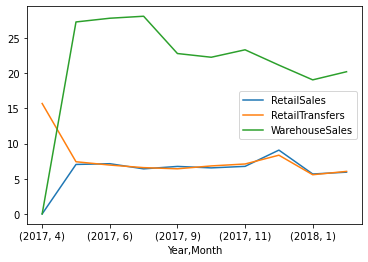

In [48]:
# x axis = month?
# y lines = RetailSales, RetailsTransfers, WarehouseSales
# x= alc_sales['Year']

# plt.plot(over_time, y='RetailSales', color='magenta')
# plt.plot(over_time, y='RetailTransfers', color='blue')
# plt.plot(over_time, y='WarehouseSales', color='yellow')
# plt.show()

over_time.plot()
plt.show()

# note: first I grouped by Month then Year and my graph looked totally different!

## 4. Plot the same information as above but as a bar chart.